# **PCA, Lab 8, Filip Gacek**

#**Task 1**

**1. Data standarization**

In [194]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler
iris_data = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['target'])

Replacing inf values, dropping nan values, dropping not numeric values, scaling

In [195]:
df_iris.replace([np.inf, -np.inf], np.nan, inplace=True)
df_iris.dropna(how="all", inplace=True)
df_iris = df_iris._get_numeric_data()
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(df_iris.iloc[:,:-1])
Y = df_iris.iloc[:, -1]

**2. Creating covariance matrix**

In [196]:
cov_matrix = np.cov(X_data_scaled.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

**3. Calculating eigenvectors and eigenvalues of the covariance matrix**

In [197]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [198]:
print(f"Eigen vectors: {eig_vectors}")
print(f"Eigen values: {eig_values}")

Eigen vectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen values: [2.93808505 0.9201649  0.14774182 0.02085386]


**4. Sort eigenvalues in a decreasing order**

Before sorting we are connecting eigenvalues and eigenvectors into tuples, in order to not mess them after eigenvalues sort.

In [199]:
eigen_pairs = [(eig_value, eig_vector) for eig_value, eig_vector in zip(eig_values, eig_vectors)]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [200]:
eigen_pairs

[(2.938085050199995,
  array([ 0.52106591, -0.37741762, -0.71956635,  0.26128628])),
 (0.9201649041624864,
  array([-0.26934744, -0.92329566,  0.24438178, -0.12350962])),
 (0.1477418210449475,
  array([ 0.5804131 , -0.02449161,  0.14212637, -0.80144925])),
 (0.020853862176462696,
  array([ 0.56485654, -0.06694199,  0.63427274,  0.52359713]))]

In [201]:
eig_values = [eig_pair[0] for eig_pair in eigen_pairs] # sorting in descending order
print(f"Sorted Eigen Values: {eig_values}")

Sorted Eigen Values: [2.938085050199995, 0.9201649041624864, 0.1477418210449475, 0.020853862176462696]


**5. Plot the variance coeficients corresponding to eigenvalues(Explained variance)**

In [202]:
total_sum = sum(eig_values)
var_exp = [(eig_val/total_sum)*100 for eig_val in eig_values] # % of total
cum_var_exp = np.cumsum(var_exp) # accumulated %

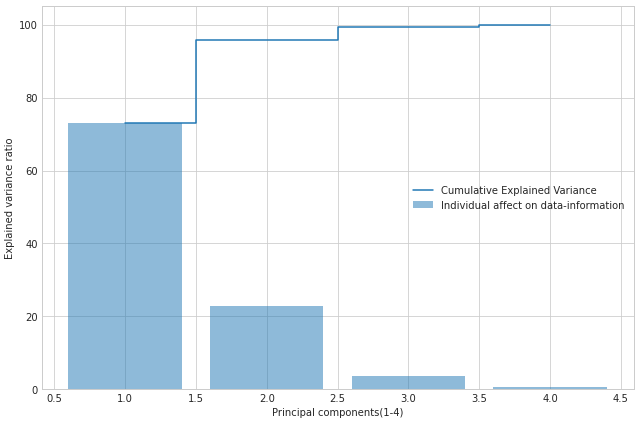

In [203]:
from matplotlib import pyplot as plt
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=[9, 6])
  plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='Individual affect on data-information')
  plt.step(range(1,5), cum_var_exp, where='mid', label='Cumulative Explained Variance')
  plt.xlabel('Principal components(1-4)')
  plt.ylabel('Explained variance ratio')
  plt.legend(loc='best')
  plt.tight_layout()

**6. Choose k biggest eigenvectors based on corresponding eigenvalues**

After analyse I decided to drop two last principal components, because they contain only 4.2% of the whole information. The first feature gives 72.77% of information and the second 23.03%. 

In [204]:
k_biggest = eigen_pairs[:2]

In [205]:
k_biggest_vectors = [vector for value, vector in k_biggest]
k_biggest_vectors

[array([ 0.52106591, -0.37741762, -0.71956635,  0.26128628]),
 array([-0.26934744, -0.92329566,  0.24438178, -0.12350962])]

Creating Projection Matrix

In [206]:
projection_matrix = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
projection_matrix

array([[ 0.52106591, -0.26934744],
       [-0.37741762, -0.92329566],
       [-0.71956635,  0.24438178],
       [ 0.26128628, -0.12350962]])

Creating new feature space

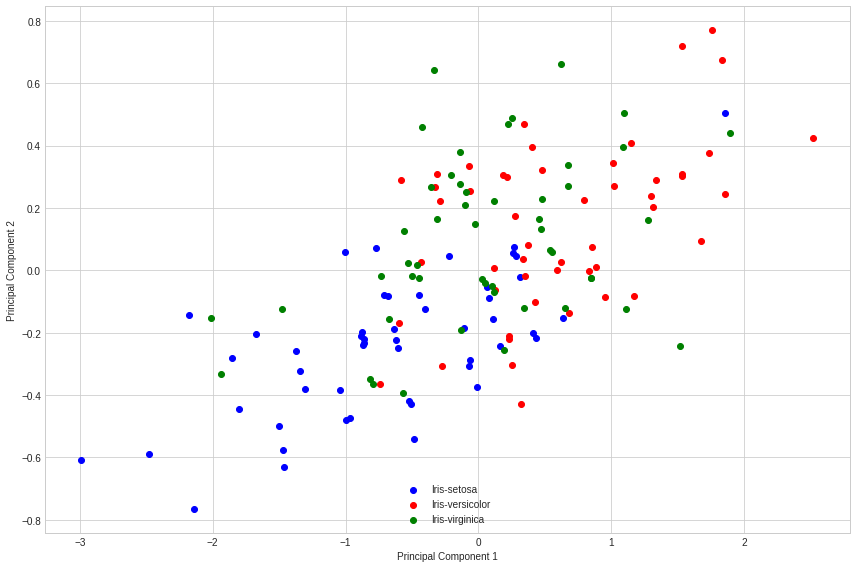

In [207]:
X_new = X_data_scaled.dot(projection_matrix)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for i, (lab, col) in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green'))):
        plt.scatter(X_new[Y==i, 1],
                    X_new[Y==i, 0],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

#**Task 2**

#**10.4**

In [208]:
import matplotlib as mpl
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Downloading data, analysing and processing it

In [209]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [211]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [212]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Standarization of dataset

In [213]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

Computing vectors with sklearn function PCA()

In [214]:
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings 

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [215]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


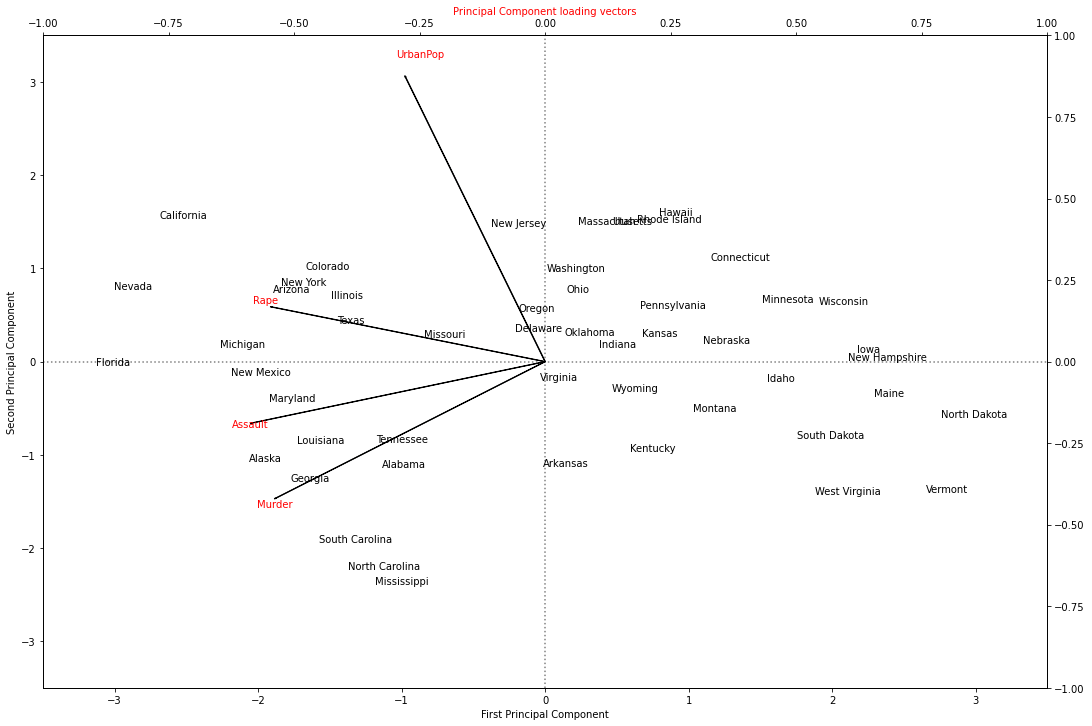

In [216]:
fig, ax1 = plt.subplots(figsize=[18,12])
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
  ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
  # Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and ta = 1.07
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
  ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [217]:
print(f"Explained variance: {pca.explained_variance_}")

Explained variance: [2.53085875 1.00996444 0.36383998 0.17696948]


In [218]:
total_sum = sum(pca.explained_variance_)
var_exp = [(eig_val/total_sum)*100 for eig_val in pca.explained_variance_] # % of total
cum_var_exp = np.cumsum(var_exp) # accumulated %

Plot of Explained Variance

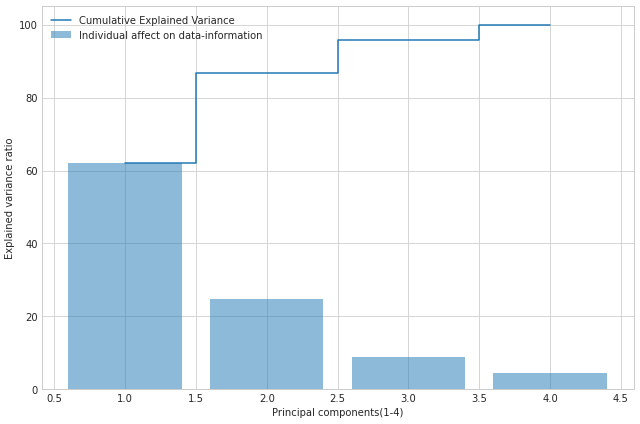

In [219]:
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=[9, 6])
  plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='Individual affect on data-information')
  plt.step(range(1,5), cum_var_exp, where='mid', label='Cumulative Explained Variance')
  plt.xlabel('Principal components(1-4)')
  plt.ylabel('Explained variance ratio')
  plt.legend(loc='best')
  plt.tight_layout()

In [220]:
print(f"Proportion of variance: {pca.explained_variance_ratio_}")

Proportion of variance: [0.62006039 0.24744129 0.0891408  0.04335752]


Plot of the PVE explained by each component

([<matplotlib.axis.XTick at 0x7f741b4d2090>,
 <a list of 4 Text major ticklabel objects>)

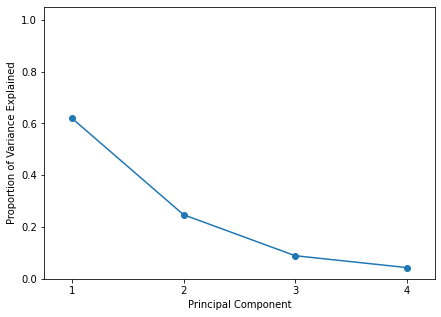

In [221]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x7f741b410ad0>,
 <a list of 4 Text major ticklabel objects>)

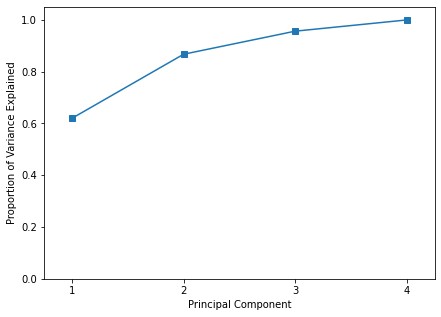

In [222]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

#**10.6**

Downloading, processing and analysing data

In [223]:
df2 = pd.read_csv('nci60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [224]:
y = pd.read_csv('nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [225]:
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

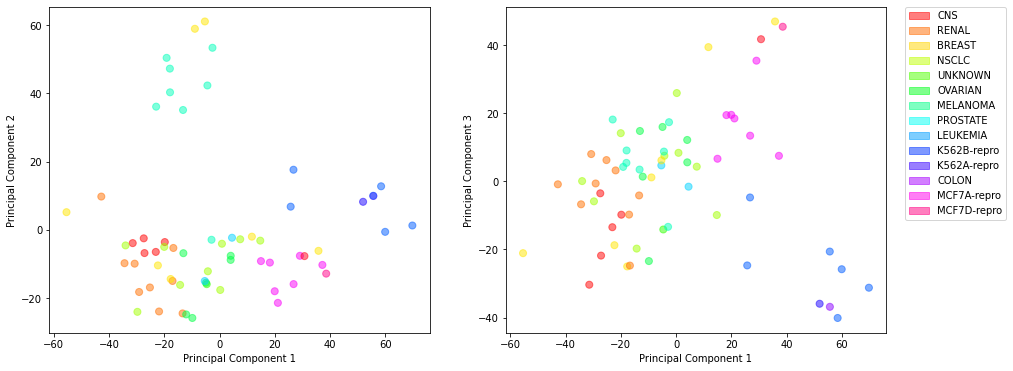

In [226]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
  ax.set_xlabel('Principal Component 1')

In [227]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
pca2.explained_variance_ratio_[:5],
np.cumsum(pca2.explained_variance_ratio_[:5])],
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

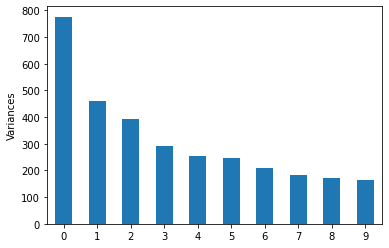

In [228]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

(-1.0, 65.0)

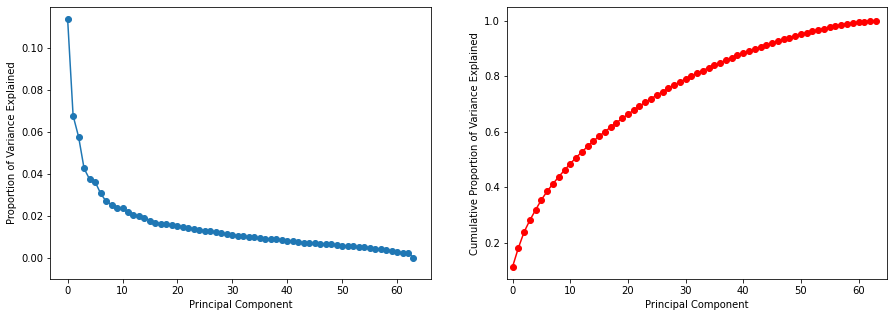

In [229]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
# Right plot
4
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
  ax.set_xlabel('Principal Component')
ax.set_xlim(-1,65)